# Naive Bayes

In [4]:
import math
import pandas as pd
import numpy as np

admit = pd.read_csv("JM1.csv")
admit


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


loc   v(g)   ev(g)   iv(g)      n        v     l      d       i  \
0        1.1    1.4     1.4     1.4    1.3     1.30  1.30   1.30    1.30   
1        1.0    1.0     1.0     1.0    1.0     1.00  1.00   1.00    1.00   
2       72.0    7.0     1.0     6.0  198.0  1134.13  0.05  20.31   55.85   
3      190.0    3.0     1.0     3.0  600.0  4348.76  0.06  17.06  254.87   
4       37.0    4.0     1.0     4.0  126.0   599.12  0.06  17.19   34.86   
...      ...    ...     ...     ...    ...      ...   ...    ...     ...   
10880   18.0    4.0     1.0     4.0   52.0   241.48  0.14   7.33   32.93   
10881    9.0    2.0     1.0     2.0   30.0   129.66  0.12   8.25   15.72   
10882   42.0    4.0     1.0     2.0  103.0   519.57  0.04  26.40   19.68   
10883   10.0    1.0     1.0     1.0   36.0   147.15  0.12   8.44   17.44   
10884   19.0    3.0     1.0     1.0   58.0   272.63  0.09  11.57   23.56   

              e  ...   lOCode   lOComment   lOBlank   locCodeAndComment  \
0          1.30  ...        2           2         2                   2   
1          1.00  ...        1           1         1                   1   
2      23029.10  ...       51          10         8                   1   
3      74202.67  ...      129          29        28                   2   
4      10297.30  ...       28           1         6                   0   
...         ...  ...      ...         ...       ...                 ...   
10880   1770.86  ...       13           0         2                   0   
10881   1069.68  ...        5           0         2                   0   
10882  13716.72  ...       29           1        10                   0   
10883   1241.57  ...        6           0         2                   0   
10884   3154.67  ...       13           0         2                   1   

        uniq_Op   uniq_Opnd  total_Op  total_Opnd  branchCount defects  
0           1.2         1.2       1.2         1.2          1.4       0  
1             1           1         1           1            1       1  
2            17          36       112          86           13       1  
3            17         135       329         271            5       1  
4            11          16        76          50            7       1  
...         ...         ...       ...         ...          ...     ...  
10880        10          15        30          22            7       0  
10881        12           8        19          11            3       0  
10882        18          15        59          44            7       0  
10883         9           8        21          15            1       0  
10884        12          14        31          27            5       0  

[10885 rows x 22 columns]

In [5]:
# admit.columns
li = admit.loc[admit.isin(["?"]).any(axis=1)].index.tolist()
median_cols = [[' uniq_Op', ' uniq_Opnd', ' total_Op', ' total_Opnd', ' branchCount']]

for i in li:
    admit[' uniq_Op'][i] = np.nan
    admit[' uniq_Opnd'][i] = np.nan
    admit[' total_Op'][i] = np.nan
    admit[' total_Opnd'][i] = np.nan
    admit[' branchCount'][i] = np.nan
    
# print(admit[' uniq_Op'][143])
# admit.loc[admit.isin(["?"]).any(axis=1)]


/home/varun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/varun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/varun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/varun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: 

In [6]:
# Data Imputation
data_final = admit.copy(deep = True)
median_cols = [[' uniq_Op', ' uniq_Opnd', ' total_Op', ' total_Opnd', ' branchCount']]

# Replace with median
for column in median_cols:
    med = data_final[column].median(skipna=True)
    data_final[column] = data_final[column].replace(np.nan, med)

print("done")

done


In [7]:
import sklearn
from sklearn.model_selection import train_test_split

X = data_final.iloc[:,0:21]
Y = data_final.iloc[:,21:22]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("done")

done


## Bernoulli Naive Bayes

----------------------------------------Bernaulli Naive Bayes--------------------------------- 

Accuracy :  76.3931414574403 %
F1 Score :  34.38297872340426 %
Precision :  36.996336996337 %
Recall :  32.11446740858506 %


/home/varun/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


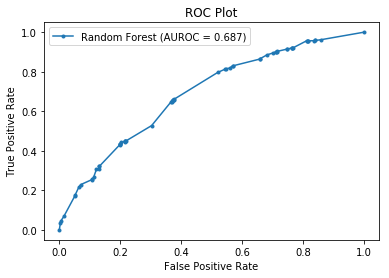

done


In [28]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt



BernNB = BernoulliNB(binarize = True)
BernNB.fit(X_train, Y_train)
predictions = BernNB.predict(X_test)

print("----------------------------------------Bernaulli Naive Bayes--------------------------------- \n")
print("Accuracy : ",accuracy_score(Y_test, predictions)*100,"%")
print("F1 Score : ",f1_score(Y_test, predictions)*100,"%")
print("Precision : ",precision_score(Y_test, predictions)*100,"%")
print("Recall : ",recall_score(Y_test, predictions)*100,"%")



rf_probs = BernNB.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(Y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)


plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

print("done")

## Multinomial Naive Bayes

---------------------------------------Multinomial Naive Bayes---------------------------

Accuracy :  79.9755052051439 %
F1 Score :  11.621621621621623 %
Precision :  38.73873873873874 %
Recall :  6.836248012718602 %


/home/varun/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


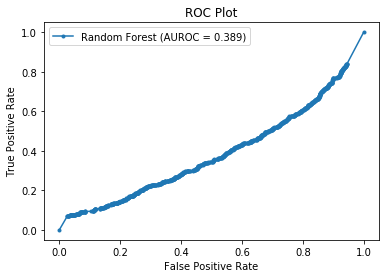

done


In [29]:


MultiNB = MultinomialNB()
MultiNB.fit(X_train, Y_train)
predictions = MultiNB.predict(X_test)


print("---------------------------------------Multinomial Naive Bayes---------------------------\n")
print("Accuracy : ",accuracy_score(Y_test, predictions)*100,"%")
print("F1 Score : ",f1_score(Y_test, predictions)*100,"%")
print("Precision : ",precision_score(Y_test, predictions)*100,"%")
print("Recall : ",recall_score(Y_test, predictions)*100,"%")



rf_probs = MultiNB.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(Y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)


plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

print("done")

## Gaussian Naive Bayes

--------------------------------------------Gaussian Naive Bayes------------------------------------

Accuracy :  80.55725658297612 %
F1 Score :  24.673784104389085 %
Precision :  48.598130841121495 %
Recall :  16.534181240063592 %


/home/varun/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


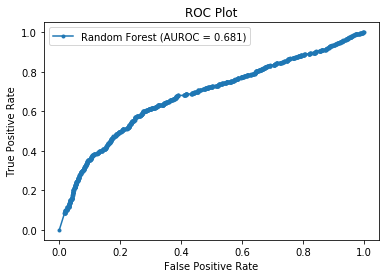

done


In [30]:
GaussNB = GaussianNB()
GaussNB.fit(X_train, Y_train)
predictions = GaussNB.predict(X_test)

print("--------------------------------------------Gaussian Naive Bayes------------------------------------\n")
print("Accuracy : ",accuracy_score(Y_test, predictions)*100,"%")
print("F1 Score : ",f1_score(Y_test, predictions)*100,"%")
print("Precision : ",precision_score(Y_test, predictions)*100,"%")
print("Recall : ",recall_score(Y_test, predictions)*100,"%")



rf_probs = GaussNB.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(Y_test, rf_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)


plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

print("done")